In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cmocean as cm
import cartopy.crs as ccrs

In [3]:
cd /g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore

/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore


In [4]:
import sys
import os
import re
from matplotlib import pyplot as plt
from pprint import pprint
from intake import open_esm_datastore
import pandas as pd
import cftime
import cf_xarray
import xarray as xr
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore'
sys.path.append(tool_dir)
from plot_functions import _expt_fullname, _read_ryaml, plot_time_series, plot2d, plot2d2

In [5]:
pics_folder = "send_to_gfdl"
pics_folder = os.path.join(tool_dir, pics_folder)
os.makedirs(pics_folder, exist_ok=True)

In [6]:
expts_manager_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager'
yaml_input = os.path.join(expts_manager_path, 'Expts_manager-025deg-restart_rest_snap-detect-trunc.yaml')
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
test_rel_path = yaml_input['test_path']
MOM_expt_dir = yaml_input['namelists']['cross_block2']['cross_block2_dirs']
MOM_list_combo = yaml_input['namelists']['cross_block2']['MOM_input']['MOM_list1_combo']
#expt_name = ['truncation_1350s_3hour_tracer_timestep']
expt_names = _expt_fullname(MOM_list_combo)

yaml_input = os.path.join(expts_manager_path, 'Expts_manager-025deg-restart_rest_snap-mean.yaml')
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
MOM_expt_dir2 = yaml_input['namelists']['cross_block3']['cross_block3_dirs']
MOM_list_combo = yaml_input['namelists']['cross_block3']['MOM_input']['MOM_list1_combo']
expt_names2 = _expt_fullname(MOM_list_combo)


MOM_dirs = MOM_expt_dir+MOM_expt_dir2
MOM_names = expt_names+expt_names2
MOM_full_paths = [os.path.join(expts_manager_path, test_rel_path, MOM_dir, 'archive') for MOM_dir in  MOM_dirs]

pprint(MOM_dirs)
pprint(MOM_names)
pprint(MOM_full_paths)

['longerexpt4_rr_mean_cfl_trunc_check_files',
 'longerexpt4_rr_mean_cfl_trunc_check_files_reproduce_check',
 'longerexpt5_rr_mean_snap1',
 'longerexpt5_rr_mean_snap2',
 'longerexpt5_rr_mean_snap3',
 'longerexpt6_rr_mean_snap1',
 'longerexpt7_rr_mean_snap1']
['DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800_U_TRUNC_FILE_U_velocity_truncations_V_TRUNC_FILE_V_velocity_truncations_MAX_TRUNC_FILE_SIZE_PER_PE_500_MAXTRUNC_5000_DEBUG_TRUNCATIONS_True',
 'DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800_U_TRUNC_FILE_U_velocity_truncations_V_TRUNC_FILE_V_velocity_truncations_MAX_TRUNC_FILE_SIZE_PER_PE_500_MAXTRUNC_5000_DEBUG_TRUNCATIONS_True',
 'DT_900_DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800_U_TRUNC_FILE_U_velocity_truncations_V_TRUNC_FILE_V_velocity_truncations_MAX_TRUNC_FILE_SIZE_PER_PE_500_MAXTRUNC_5000_DEBUG_TRUNCATIONS_True',
 'DT_900_DT_THERM_7200_DIABATIC_FIRST_Fals

In [7]:
output_expt_path = os.path.join(expts_manager_path, test_rel_path)
intake_esm_ds = 'intake_esm_ds.json'

In [8]:
datastore_tot = []
MOM_dirs_tot = []
MOM_dirs_path_tot = []
MOM_names_tot = []

for i,j,k in zip(MOM_dirs,MOM_names,MOM_full_paths):
    archive_path = os.path.join(f"{output_expt_path}",f"{i}","archive")
    datastore_path = os.path.join(f"{archive_path}",intake_esm_ds)
    if os.path.isfile(datastore_path):
        datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
        datastore_tot.append(datastore)
        MOM_dirs_tot.append(f"{i}")
        MOM_dirs_path_tot.append(f"{k}")
        MOM_names_tot.append(f"{j}")
pprint(MOM_dirs_tot)
pprint(MOM_dirs_path_tot)
pprint(MOM_names_tot)
pprint(datastore_tot)

['longerexpt4_rr_mean_cfl_trunc_check_files',
 'longerexpt4_rr_mean_cfl_trunc_check_files_reproduce_check',
 'longerexpt5_rr_mean_snap1',
 'longerexpt5_rr_mean_snap2',
 'longerexpt5_rr_mean_snap3',
 'longerexpt6_rr_mean_snap1',
 'longerexpt7_rr_mean_snap1']
['/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg/longerexpt4_rr_mean_cfl_trunc_check_files/archive',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg/longerexpt4_rr_mean_cfl_trunc_check_files_reproduce_check/archive',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg/longerexpt5_rr_mean_snap1/archive',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg/longerexpt5_rr_mean_snap2/archive',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg/longerexpt5_rr_mean_snap3/archive',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manag

In [9]:
MOM_names_tot = [
    'truncation_1350s_3hour_dt_therm',
    'na',
    'na',
    'na',
    'na',
    'truncation_1080s_3hour_dt_therm',
    'truncation_1200s_3hour_dt_therm',
]


all indices: [[-1]]
total subplots: 1 for 2d contourf plots
0 -1
processing truncation error files...
available trunc_keys: [8, 10]
plots@@@
8
'lon_indices: [1351]'
'lat_indices: [894]'
'datetime: [datetime.datetime(1900, 8, 5, 23, 49, 47)]'
'lon: [57.83]'
'lat: [70.39]'
'evaluate lon: [57.875]'
'evaluate lat: [70.41154332]'
10
('lon_indices: [1351, 1351, 1351, 1351, 1351, 1351, 1351, 1351, 1351, 1351, '
 '1351]')
'lat_indices: [894, 894, 894, 894, 894, 894, 894, 894, 894, 894, 894]'
('datetime: [datetime.datetime(1900, 10, 17, 5, 49, 48), '
 'datetime.datetime(1900, 10, 17, 8, 49, 48), datetime.datetime(1902, 10, 16, '
 '20, 10, 12), datetime.datetime(1902, 10, 16, 20, 30), '
 'datetime.datetime(1902, 10, 16, 20, 49, 47), datetime.datetime(1903, 10, 16, '
 '17, 10, 12), datetime.datetime(1903, 10, 16, 17, 30), '
 'datetime.datetime(1903, 10, 16, 17, 49, 47), datetime.datetime(1903, 10, 17, '
 '2, 10, 11), datetime.datetime(1903, 10, 17, 2, 30), datetime.datetime(1903, '
 '10, 17, 2, 4

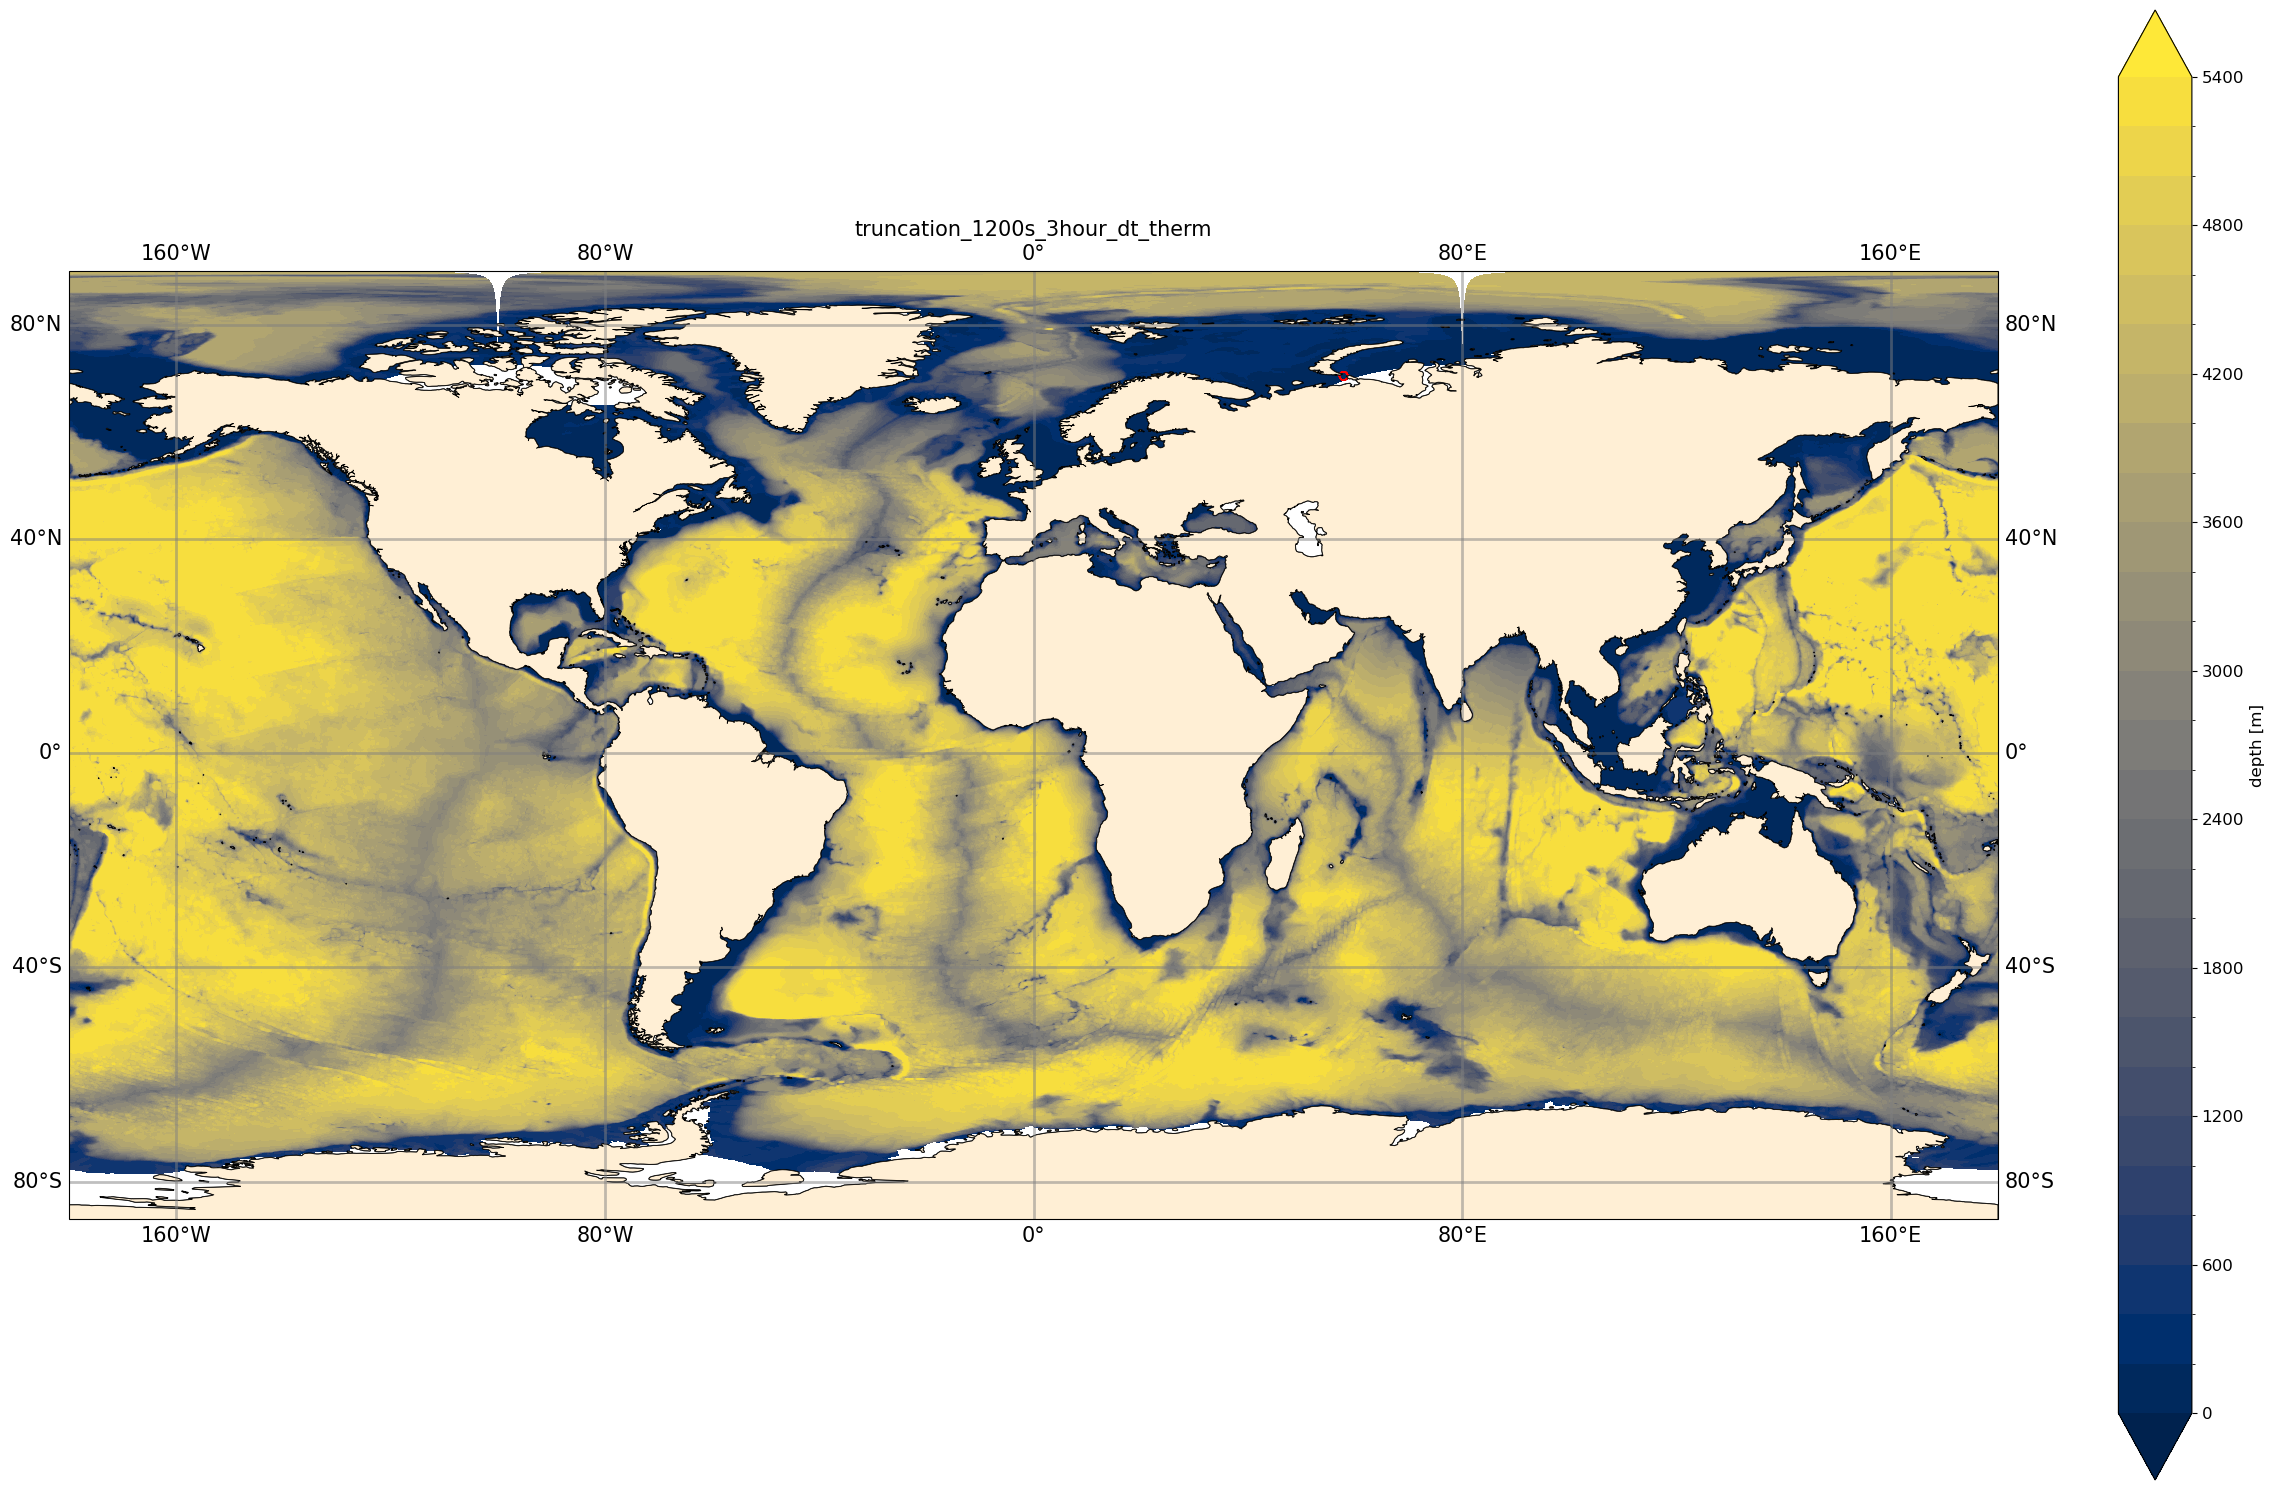

In [37]:
%%time
plots_config = [
            {
             'indices': [-1],
            },
           ]
plot2d2(datastore_tot,MOM_names_tot,
                data_collect_method='mean',
                plots_config=plots_config,
                figsize=(25,15),
                cmap = 'cividis',
                time_selection = 'date_slice',
                time_range = ['1900-01-01', '1904-01-01'],
                yincrease = True,
                truncation_errors=True, trunc_variable='trunc_month', trunc_plot=None, MOM_dirs_path_tot = MOM_dirs_path_tot,
                project_ccrs=True, geo_plot=True, levels=33, title_fontsize=15,
                )
plt.tight_layout()

all indices: [[0, -1, -2]]
total subplots: 3 for 2d contourf plots
0 0
processing truncation error files...
available trunc_keys: [1, 10, 12]
plots@@@
1
'lon_indices: [889, 888, 889, 888, 903, 904, 905, 906, 907, 903, 904, 905, 906]'
'lat_indices: [778, 780, 780, 780, 768, 768, 768, 768, 768, 767, 767, 767, 767]'
('datetime: [datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), '
 'datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, '
 '48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), '
 'datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, '
 '48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36)]')
('lon: [-57.62, -57.88, -57.62, -57.88, -54.0, -53.75, -53.5, -53.25, -53.0, '
 '-54.0, -53.75, 

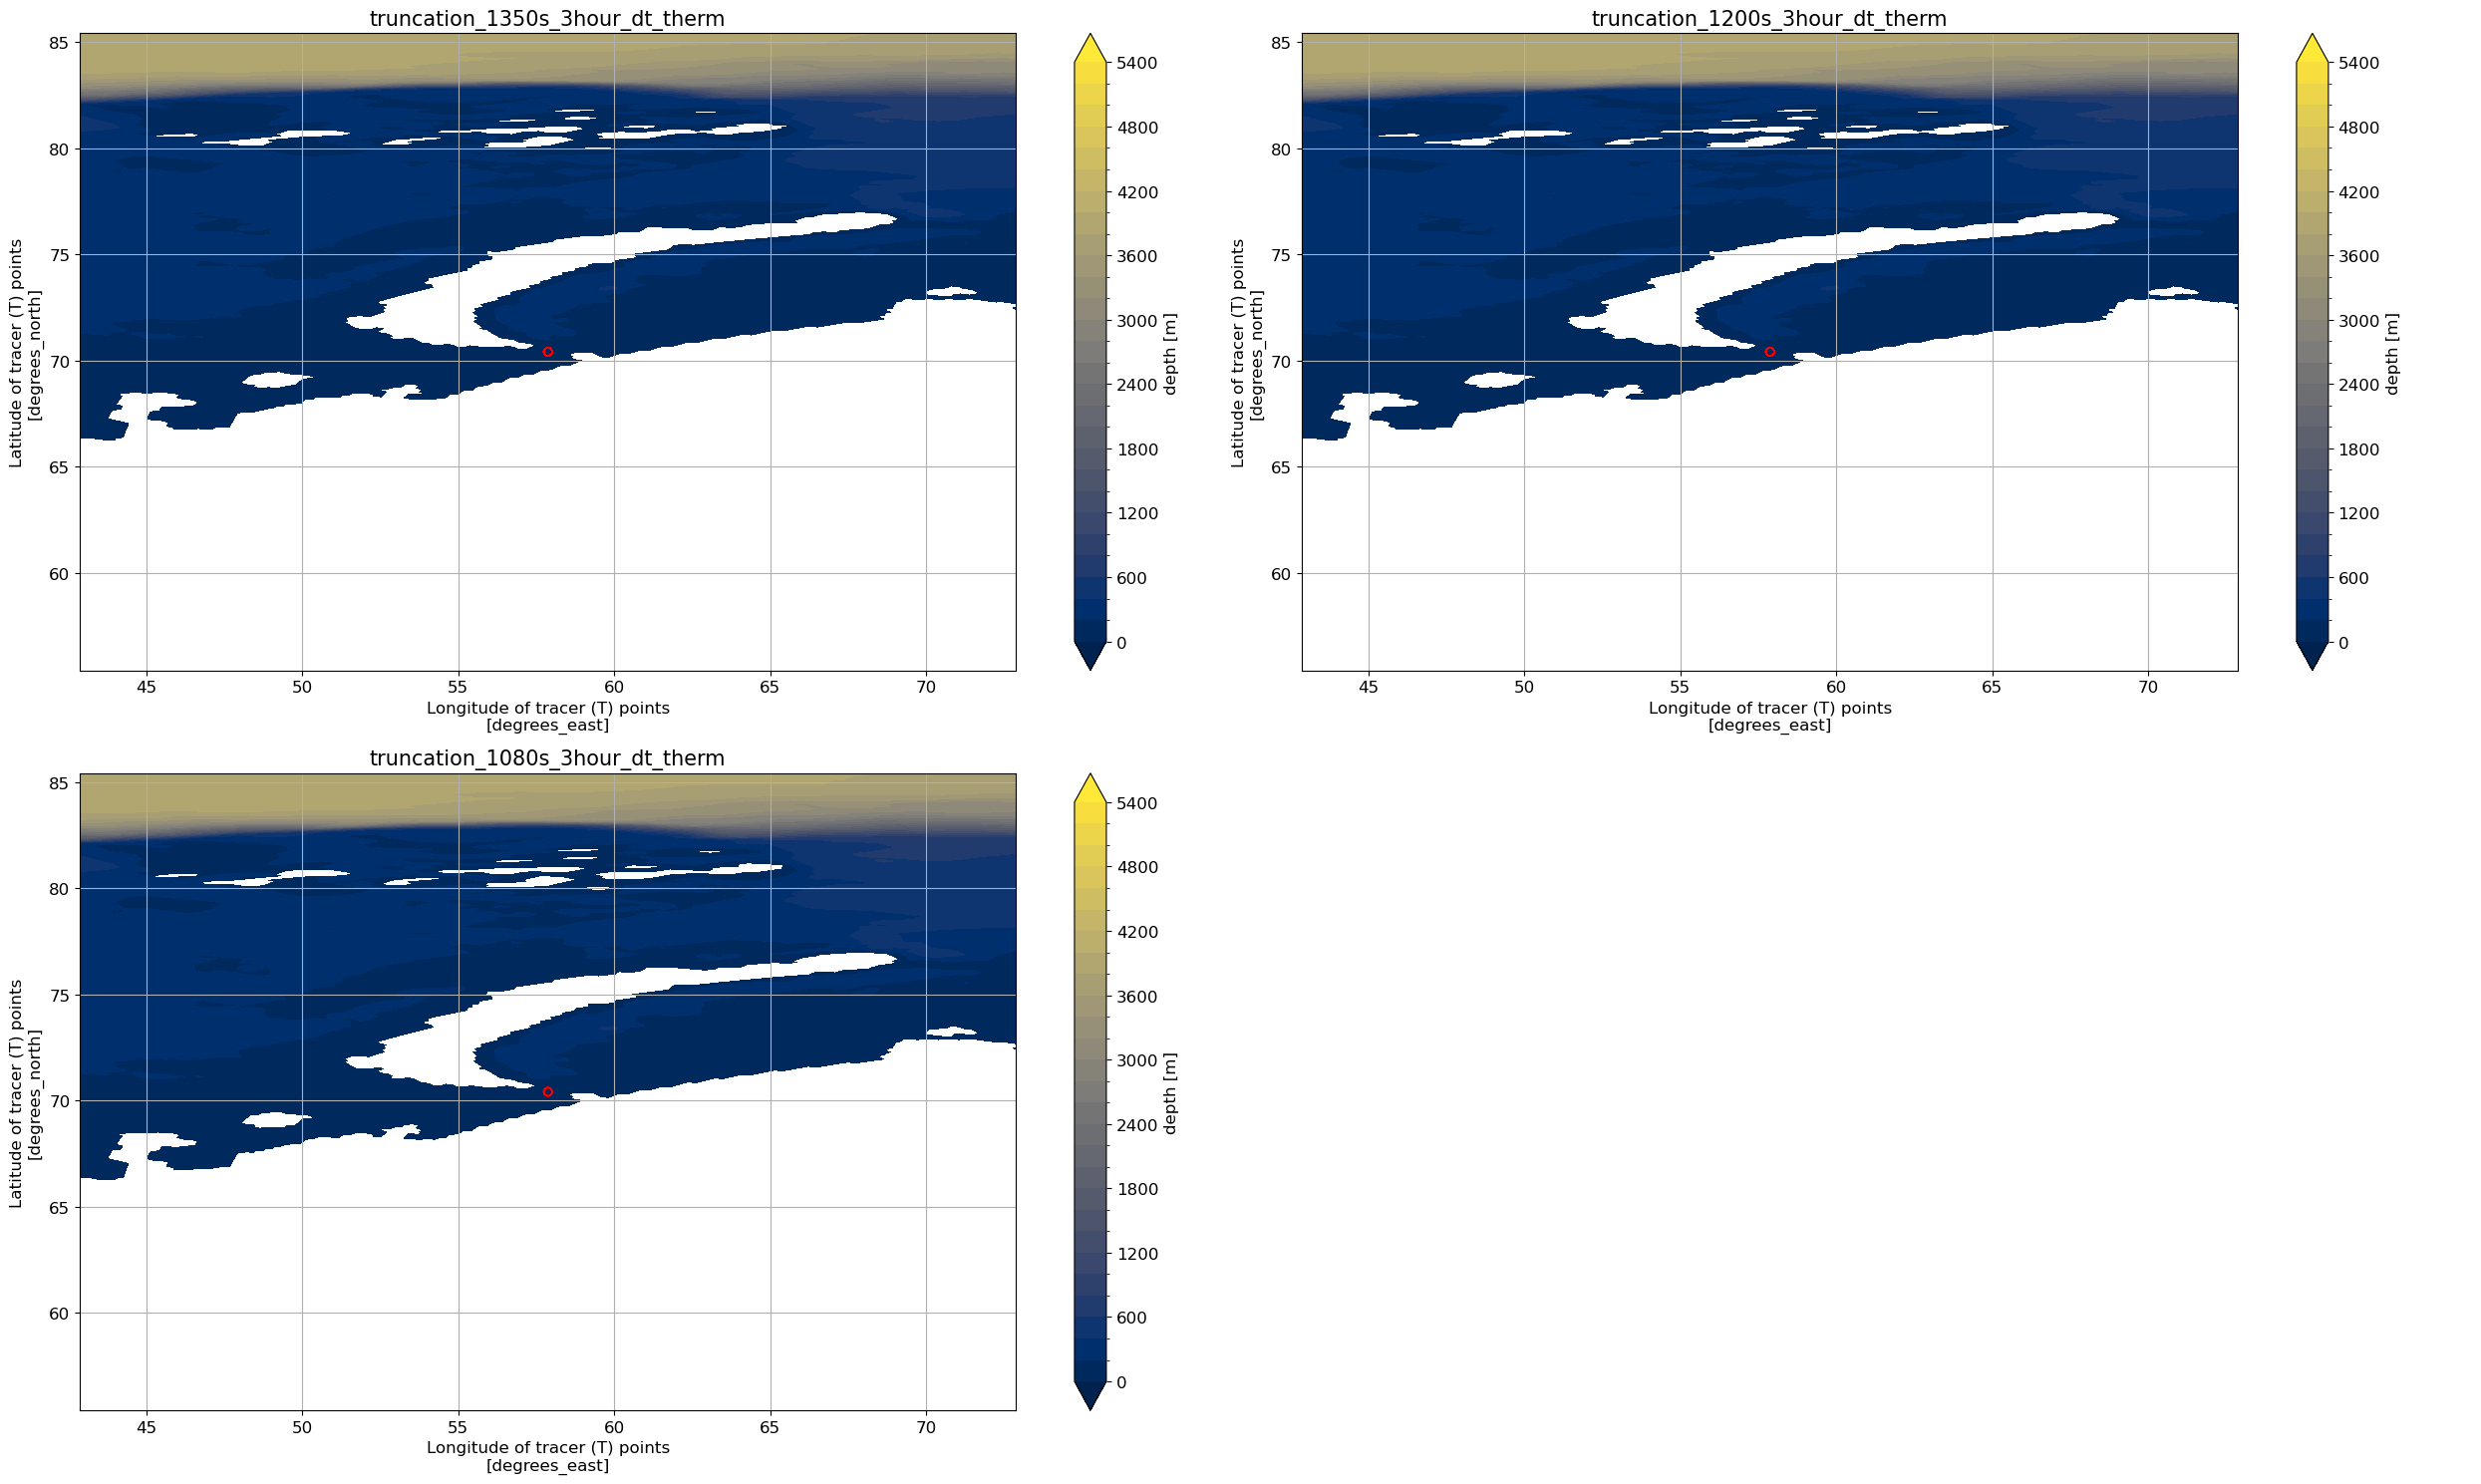

CPU times: user 7.69 s, sys: 207 ms, total: 7.89 s
Wall time: 8.16 s


In [41]:
%%time
zoom_in=15
plots_config = [
            {'var':'thetao', # dummy variable for truncation plots
             'indices': [0,-1,-2],
             'xlims': [57.875-zoom_in, 57.875+zoom_in],
             'ylims': [70.41154332-zoom_in, 70.41154332+zoom_in]
            },
           ]
plot2d2(datastore_tot,MOM_names_tot,
                data_collect_method='mean',
                plots_config=plots_config,
                figsize=(25,15),
                cmap = 'cividis',
                time_selection = 'date_slice',
                time_range = ['1900-01-01', '1904-01-01'],
                yincrease = True,
                truncation_errors=True, trunc_variable='trunc_month', trunc_plot=None, MOM_dirs_path_tot = MOM_dirs_path_tot,
                project_ccrs=False, geo_plot=True, levels=33, title_fontsize=15,
                )
plt.tight_layout()
pic_name = "truncation_locations"
file_path = os.path.join(pics_folder, pic_name+ ".png")
plt.savefig(file_path,dpi=400)
plt.show()

all indices: [[0, -1, -2]]
total subplots: 3 for 2d contourf plots
0 0
processing truncation error files...
available trunc_keys: [1, 10, 12]
plots@@@
1
'lon_indices: [889, 888, 889, 888, 903, 904, 905, 906, 907, 903, 904, 905, 906]'
'lat_indices: [778, 780, 780, 780, 768, 768, 768, 768, 768, 767, 767, 767, 767]'
('datetime: [datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), '
 'datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, '
 '48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), '
 'datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, '
 '48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36)]')
('lon: [-57.62, -57.88, -57.62, -57.88, -54.0, -53.75, -53.5, -53.25, -53.0, '
 '-54.0, -53.75, 

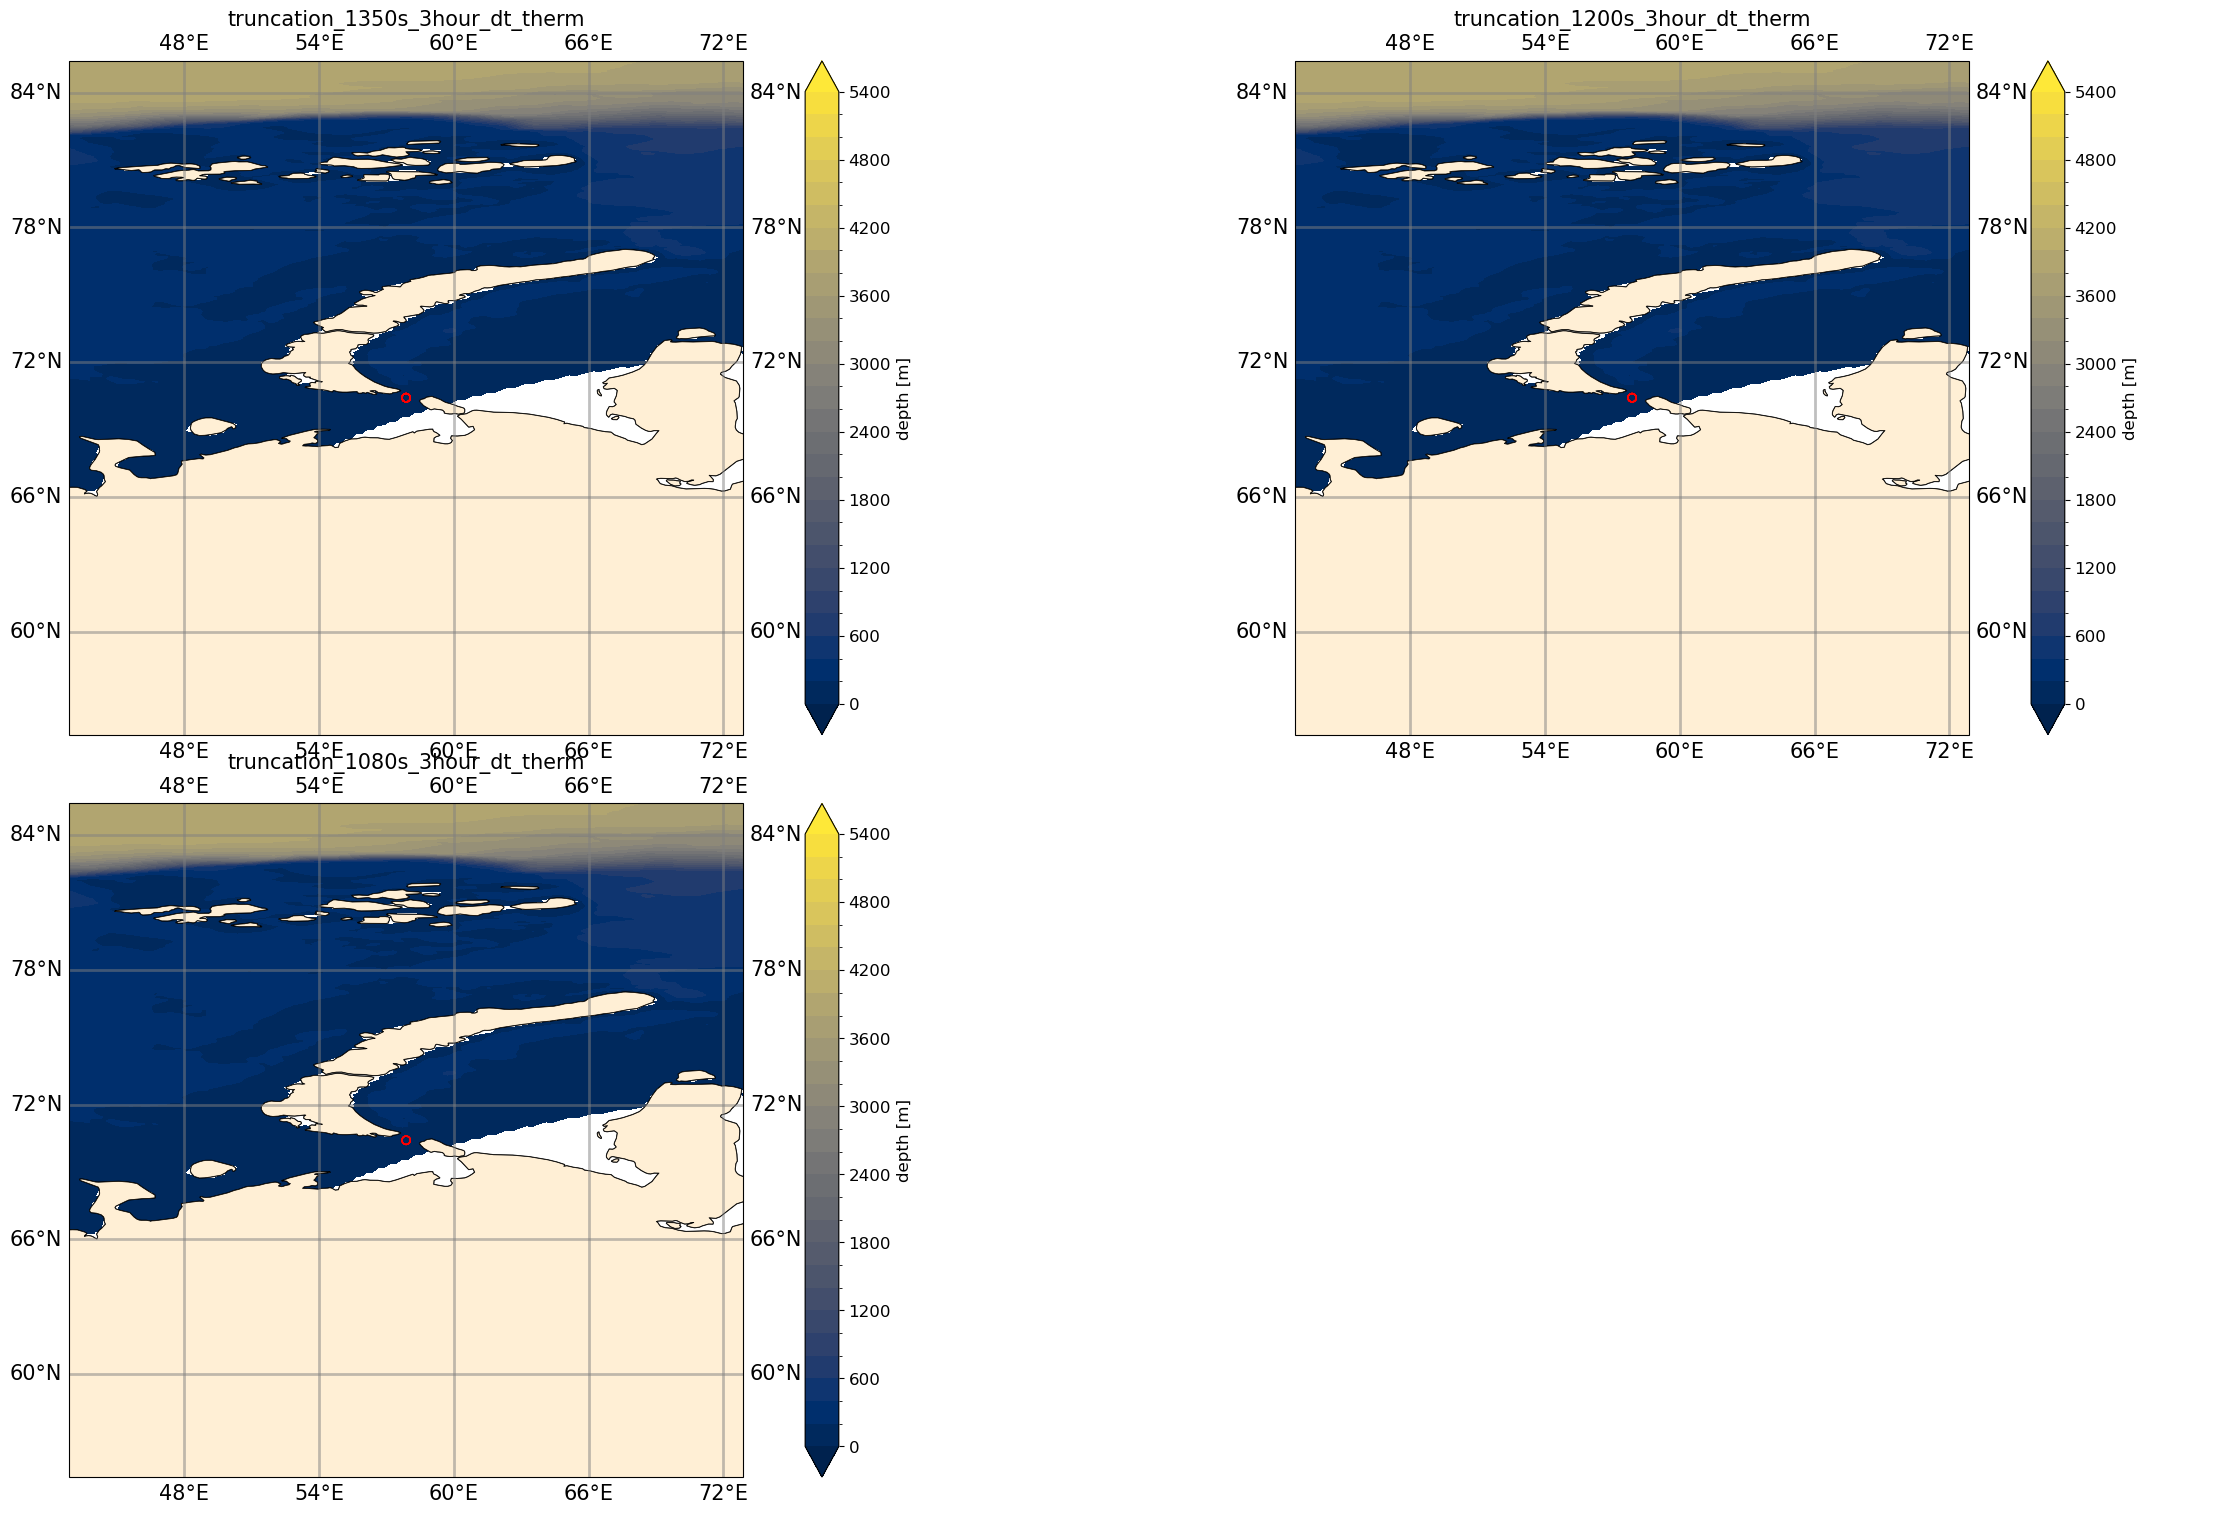

CPU times: user 9min 32s, sys: 676 ms, total: 9min 33s
Wall time: 9min 33s


In [40]:
%%time
zoom_in=15
plots_config = [
            {'var':'thetao', # dummy variable for truncation plots
             'indices': [0,-1,-2],
             'xlims': [57.875-zoom_in, 57.875+zoom_in],
             'ylims': [70.41154332-zoom_in, 70.41154332+zoom_in]
            },
           ]
plot2d2(datastore_tot,MOM_names_tot,
                data_collect_method='mean',
                plots_config=plots_config,
                figsize=(25,15),
                cmap = 'cividis',
                time_selection = 'date_slice',
                time_range = ['1900-01-01', '1904-01-01'],
                yincrease = True,
                truncation_errors=True, trunc_variable='trunc_month', trunc_plot=None, MOM_dirs_path_tot = MOM_dirs_path_tot,
                project_ccrs=True, geo_plot=True, levels=33, title_fontsize=15,
                )
plt.tight_layout()
pic_name = "truncation_locations_ccrs_geo_plot"
file_path = os.path.join(pics_folder, pic_name+ ".png")
plt.savefig(file_path,dpi=400)
plt.show()

0
processing truncation error files...
available trunc_keys: [1, 10, 12]
1
'lon_indices: [894, 889, 894, 889, 904, 905, 906, 907, 908, 904, 905, 906, 907]'
'lat_indices: [779, 780, 780, 781, 769, 769, 769, 769, 769, 768, 768, 768, 768]'
('datetime: [datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), '
 'datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, '
 '48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), '
 'datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, '
 '48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36), datetime.datetime(1900, '
 '1, 1, 2, 48, 36), datetime.datetime(1900, 1, 1, 2, 48, 36)]')
('lon: [-57.62, -57.88, -57.62, -57.88, -54.0, -53.75, -53.5, -53.25, -53.0, '
 '-54.0, -53.75, -53.5, -53.25]')
('lat: [57.29, 57.43, 57.43, 57.56, 55.85, 55.85, 55.85, 55.8

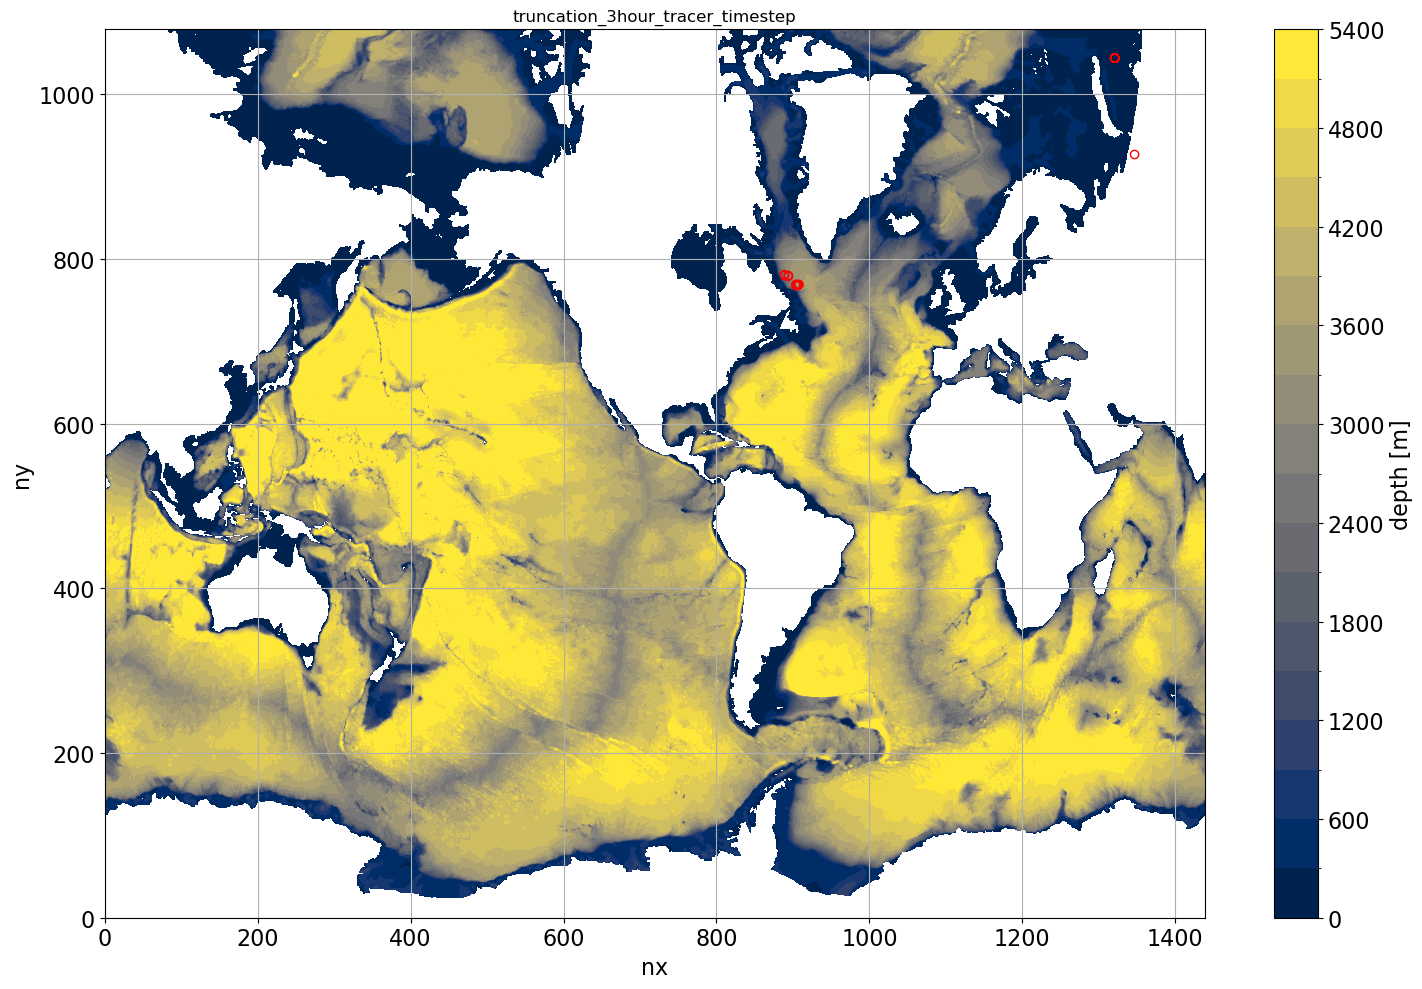

In [26]:
%%time
var = 'umo'
tmp_indx = [0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [MOM_names_tot[i] for i in tmp_indx]
plot2d(datastore_expts,
        MOM_names_expts,
        var,
        time_selection = 'date_slice',
        start_time = '1900-01-01',
        end_time = '1900-01-01',
        ncols=1,
        figsize=(15,10),
        cmap = 'cividis',
        yincrease = True,
        truncation_errors=True, trunc_variable='trunc_month', trunc_plot=None, MOM_dirs_path_tot = MOM_dirs_path_tot,
        xlims=None, ylims=None,
      )
plt.tight_layout()